In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [23]:
#1st column: wavelength; 2nd column: radiation
lamb, dexp= np.loadtxt("Exp_data_Aluminium.txt", unpack=True)

In [24]:
def L_0(lamb, T):
    h=6.62e-34 #in Joules
    c=3e8 #in m/s
    k_B=1.38e-23 #in J/K
    return 2.0*h*c**2*(1/(lamb**5)/(np.exp(h*c/(k_B*lamb*T))-1))

In [25]:
def L_s(lamb, T, epsilon):
    return epsilon*L_0(lamb, T)+(1-epsilon)*L_0(lamb, 300)

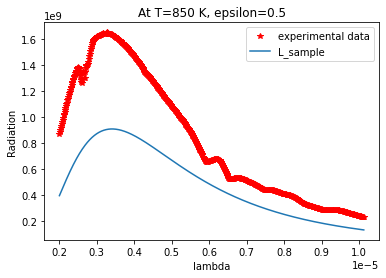

In [26]:
T=850
epsilon=0.5
plt.plot(lamb, dexp, '* r')
plt.plot(lamb, L_s(lamb,T, epsilon))
#plt.plot(lamb, epsilon*L_0(lamb,T))
#plt.plot(lamb, (1-epsilon)*L_0(lamb, T))
plt.xlabel('lambda')
plt.ylabel('Radiation')
plt.title("At T=850 K, epsilon=0.5")
plt.legend(["experimental data","L_sample"])
##There's contribution of environment which affects the final measurements. 
##In this case, L_surface is the same that L_environment, because the value of epsilon. 

In [27]:
##To update Temperature (T)and emisivity (epsilon)
def residue(param):
    return L_s(lamb, param[0], param[1])-dexp

In [28]:
T0=850
epsilon0=0.5
param_deb=(T0,epsilon0)
LM=op.leastsq(residue, param_deb, full_output=1)
param=LM[0]
print("The final values of Temperature and emisivity are:\n {}K and {} respectively". format(param[0], param[1]))

The final values of Temperature and emisivity are:
 905.084158940845K and 0.6460248807768878 respectively


Text(0.5, 1.0, 'At T = 905.084158940845 K, epsilon = 0.6460248807768878')

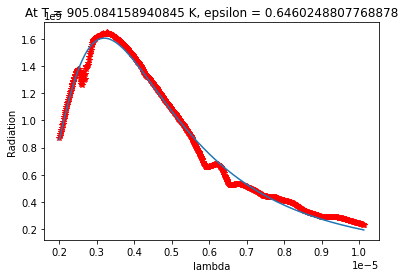

In [29]:
plt.plot(lamb, dexp, '* r')
plt.plot(lamb, L_s(lamb,param[0], param[1]))
plt.xlabel('lambda')
plt.ylabel('Radiation')
plt.title("At T = {} K, epsilon = {}".format(param[0],param[1]))

In [30]:
#Relative sensitivities.
rel_sens_T=param[0]*(L_s(lamb,param[0]*1.001, param[1])-L_s(lamb, param[0], param[1]))/(0.001*param[0])
rel_sens_ep=param[1]*(L_s(lamb,param[0], param[1]*1.001)-L_s(lamb, param[0], param[1]))/(0.001*param[1])

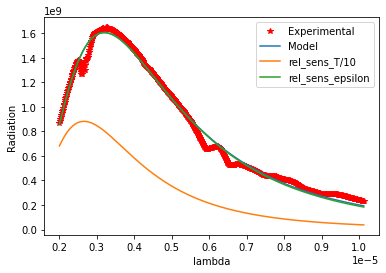

In [31]:
plt.plot(lamb, dexp, '* r')
plt.plot(lamb, L_s(lamb,param[0], param[1]))
plt.plot(lamb, rel_sens_T/10)
plt.plot(lamb, rel_sens_ep)
plt.xlabel('lambda')
plt.ylabel('Radiation')
plt.legend(["Experimental","Model", "rel_sens_T/10", "rel_sens_epsilon"])

In [32]:
N= len(dexp)
X=np.c_[rel_sens_T, rel_sens_ep]
Hessian = np.linalg.inv(np.dot(X.T,X))
ss = np.sqrt((sum(residue(param)))**2/(N-0))
Cov_Matrix = Hessian*ss**2
print("Covariance matrix of sens_T and sens_epsilon, is: \n\n",Cov_Matrix)
print("\n\n")
corr=np.zeros((2,2))
for i in range(0, 2):
    for j in range(0,2):
        corr[i,j]=corr[i,j]+Cov_Matrix[i,j]/(np.sqrt(Cov_Matrix[i,i]*Cov_Matrix[j,j]))
print("Correlation matrix of sens_T and sens_epsilon is: \n\n", corr)

Covariance matrix of sens_T and sens_epsilon, is: 

 [[ 6.09357251e-06 -2.70766627e-05]
 [-2.70766627e-05  1.30368078e-04]]



Correlation matrix of sens_T and sens_epsilon is: 

 [[ 1.         -0.96066841]
 [-0.96066841  1.        ]]


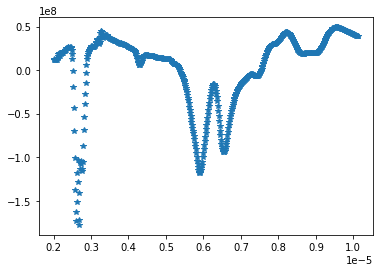

In [33]:
#Error plot
plt.plot(lamb, dexp-L_s(lamb,param[0], param[1]), '*')
##to plot only in the range without the peaks
#plt.xlim([0.29e-5,1.0e-5])